# Computational Skills for Materials Science

## Session 4 - Modelling: coursework

### Name:

### Student number:

In this week's notebook we modelled atomic bonds as springs whose behaviour followed that described by [Hooke's law](http://hyperphysics.phy-astr.gsu.edu/hbase/permot2.html).  According to Hooke's law the extension of a spring is linearly related (proportional) to the magnitude of the applied force.  If such an extended spring is then released, a mass attached to the spring's end will undergo [simple harmonic motion](http://hyperphysics.phy-astr.gsu.edu/hbase/shm2.html) (SHM).  SHM appears frequently in both nature and technology.  The pendulum in a grandfather clock, the vibrating strings in a piano and a bungee jumper bouncing up and down are all examples of SHM.  Resonant circuits, otherwise known as LC circuits, are simple harmonic oscillators used in electronics.  The French physicist Jean Foucault used a long pendulum to prove that the Earth rotated upon its axis.  Again a pendulum is an example of SHM and a Foucault pendulum can be seen in the Manchester Conference Centre on Sackville Street.  In this week's coursework we will create a computer model to simulate SHM and explore its behaviour.

<figure>
<img src="Figures/F_pendulum1.jpg" width='500'>
<figcaption></figcaption>
</figure>

<figure>
<img src="Figures/F_pendulum2.jpg" width='500'>
<figcaption></figcaption>
</figure>

## Simple Harmonic Motion (SHM)

The defining feature of a system that exhibits SHM is that the restoring force acting upon the system is proportional to and in the opposite direction to the displacement from the equilibrium position. The restoring force is that which acts to return the system to its equilibrium state. For example, the maximum restoring force that occurs in a pendulum's cycle happens when the pendulum bob is at its maximum displacement from the equilibrium point. The restoring force acts in the opposite direction to the displacement, which is back towards the equilibrium point. When the pendulum bob reaches the equilibrium point (i.e. the pendulum arm is vertical), the restoring force is zero and the pendulum's momentum keeps it in motion. Thus there is a cycle of maximum momentum and zero force at the equilibrium point, and zero momentum and maximum restoring force at the point of greatest displacement.

## Analytical solution for SHM
First of all we will derive an analytical solution for SHM.  According to Hooke's law the restoring force $F$ acting upon a mass attached to a spring and displaced to a position $x$ will be

$$F = - kx.$$

$k$ is the spring constant and we have specified $x=0$ to be the equilibrium point ($F=0$).

The force due to the spring causes the oscillating mass to accelerate. Applying Newton's second law gives

$$m a = - k x,$$

where $m$ is the mass of the oscillator. The acceleration, $a$, is the second derivative of displacement with respect to time.  Making this substitution and rearranging gives

$$\frac{d^2x}{dt^2} = - \frac{k}{m} x.$$

This is a second-order, linear differential equation.  A solution of this is 

$$x(t) = A \cos(\omega_0 t),$$

where $A$ is the amplitude of oscillation and $\omega_0$ is the angular frequency of the oscillating mass and is given by

$$\omega_0=\sqrt{\frac{k}{m}}.$$

### <span style="color: red"> Question 1</span> 
#### 1.1 Show that ${x(t) = A \cos(\omega_0 t)}$ is a solution of $\frac{d^2x(t)}{dt^2} = -\frac{k}{m} x(t)$.  Use $\LaTeX$ to produce any mathematical text (3 marks).

One of the defining features of simple harmonic oscillators is that their period of oscillation (the time for one complete cycle of motion) is independent of the amplitude.  This feature makes them ideal regulators for timing devices.  An example of this is the balance in a mechanical wristwatch, shown in the video below.

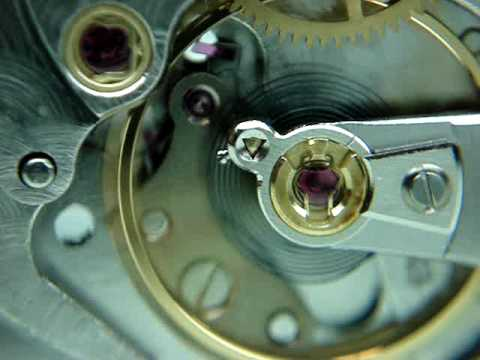

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('7gTXo5uGAzc')

### <span style="color: red"> Question 2</span> 
#### 2.1 Set $A=0.2\,\mathrm{m}$, $m = 1.5\,\mathrm{kg}$ and $k = 5.5\,\mathrm{kg}\, \mathrm{s}^{-2}$.  Now plot out the analytical solution for the first 10 seconds of oscillations, with time on the x-axis and displacement on the y-axis.  Remember to label your axes correctly (4 marks).

## Simulating SHM
Above, we produced a plot of the oscillator's motion using an analytical solution for SHM.  However a great many practical problems cannot be solved analytically and this is where the power of computer modelling becomes apparent.
Now we will construct a computer model to simulate SHM. We will first set up a system of equations to represent the physics of the oscillating mass. The code below is annotated to explain what it is doing:

In [2]:
m = 1.5    # Mass of oscillator
k = 5.5    # Spring constant

#Note that we'll use these values of mass and spring constant throughout, so there's no need to redefine them.

Next we use a function to define the restoring force $F$ on the oscillator. In the first part of the coursework the restoring force simply depends on the displacement of the oscillator $x$. However, we're going to define a more general function - you'll see why later:

In [3]:
def F(x,v,t):
    return -k*x

Next we need to decide what information we want to record about our oscillator. Clearly we will be interested in the position $x$ and velocity $v$ as a function of time $t$ , but we might also want to record the kinetic energy $T=mv^2/2$, and the potential energy $V=kx^2/2$.

In [4]:
# Define functions to calculate the kinetic, potential and total energy of the oscillator.
def T(v):
    return m*v**2.0/2.0

def V(x):
    return k*x**2.0/2.0

def E(v,x):
    return m*v**2.0/2.0 + k*x**2.0/2.0

# energy_1=E(0,0.1)   #Set the initial displacement as 0.1m.
# print energy_1

Now we need to simulate the motion of our oscillator. We do this by iterating through the equations of motion using a Python loop. Each cycle through the loop represents the evolution of the oscillator over a short period of time called the *timestep*, often denoted $dt$.

The following schematic displays how the timestepping algorithm works:

<figure>
<img src="Figures/alg1.jpg" width='800'>
<figcaption></figcaption>
</figure>

The code below implements a function `oscillator()` that runs a simulation of the motion of the oscillator. Use the annotations to help you understand what is going on.

In [5]:
def oscillator(x0,v0,t0,dt,run_time):
    x = x0 # Load the initial values of displacement, velocity and time into variables
    v = v0
    t = t0
    steps = int(run_time / dt)   # Work out how many timesteps will be required
    x_list = [x0]   # Add initial values of displacement, velocity and time into lists 
    v_list = [v0]
    t_list = [t0] 
    # Now implement a for loop to pass through the loop on each timestep
    for n in range(steps):  
        dv = F(x,v,t)/m * dt # Calculate change in velocity during time dt due to force
        v = v + dv           # Update velocity
        x = x + v*dt         # Update displacement
        t = t + dt           # Increase time by one timestep
        x_list.append(x)     # Add new vales of displacement, velocity and time onto end of lists
        v_list.append(v)
        t_list.append(t)
    return x_list, v_list, t_list   # End function and return lists values of displacement, velocity and time.

Now, to run a simulation we begin by setting up the initial conditions for our oscillator at $t=0$. We choose to model our oscillator with an initial displacement of $x(t=0)=0.2\,\textrm{m}$ starting from rest $v(t=0)=0.0\,\textrm{m}\,\textrm{s}^{-1}$.  This replicates extending a spring 20cm, holding it steady and then releasing it. We then pass these values to our function, along with the timestep `dt` and the length of time we want to simulate for, `run_time`. The function returns lists of the position, velocity and time during the simulation, which we then store in lists `x_sim`, `v_sim` and `t_sim`:

In [6]:
#Initialise time, displacement and velocity (We're extending the spring then letting go of it).
t0 = 0.0
x0 = 0.2
v0 = 0.0

c = 0.0           # Set this parameter to zero - not needed yet
F0 = 0.0          # Set this parameter to zero - not needed yet

dt = 0.1          # Set the size of the timestep, which is the change in time over each iteration.
run_time = 10.0   # Set the length of time to run the simulation for

x_sim, v_sim, t_sim = oscillator(x0,v0,t0,dt,run_time)

### <span style="color: red"> Question 3</span> 
#### 3.1: Compare the result of the simulation with the analytical solution, by plotting them both together on the same set of axes (3 marks).
(Hint: the list `x_sim` contains a list of the values of $x$ at the times recorded in the list `t_sim`. You can plot these directly using plt.plt().  Then use your values in `tvals` from earlier to generate results for the analytical solution, $x=A\cos(\omega_0 t)$, as done earlier in this notebook in task 2.1.)

## The importance of the timestep $dt$

The size of the timestep $dt$ is a very important issue in simulations like the one above (and particularly for more complex simulations involving millions of particles). If $dt$ is too small then the simulation takes a long time to calculate. If it is too large then the simulation will not behave correctly, often failing to conserve energy.

### <span style="color: red"> Question 4</span> 
#### 4.1 Explore how changing the value of the timestep $dt$ affects the energy conservation in the simulation (8 marks).
Below, we have reproduced the SHM simulation code in a single cell to help you to complete this task. Try dt values of 0.1s, 0.01s, 0.001s and 0.0001s and observe how the total energy of the simulation behaves. Produce a plot of the maximum error in the total energy as a function of timestep $dt$.

(Hint: a 'for loop' will help you to iterate through the values of dt more quickly, though use of this method is not compulsory and it would be fine to explore different values of $dt$ by simply amending the value in the code below and extracting the error in energy.)

In [ ]:
t0 = 0.0
x0 = 0.1
v0 = 0.0
dt = 0.1  #Use values of 0.1, 0.01, 0.001 and 0.0001.        
run_time = 10.0   

x_sim, v_sim, t_sim = oscillator(x0,v0,t0,dt,run_time)

plt.plot(t_sim,V(np.asarray(x_sim)),label='V')
plt.plot(t_sim,T(np.asarray(v_sim)),label='T')
plt.plot(t_sim,E(np.asarray(v_sim),np.asarray(x_sim)),label='E')
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend(ncol=3)
plt.ylim(0,0.07)

print("The maximum error is " + str(100*(max(E(np.asarray(v_sim),np.asarray(x_sim)))- E(v0,x0))/ E(v0,x0)) + "%.")

### Add your solution for the plot requested in task 4 here.


## ------------------------------ End of assesed coursework. ----------------------------------------


# Optional Section: A damped simple harmonic oscillator.
### This section is not compulsory and does not count towards your coursework mark.  However, we encourage you to work through it, as it gives an example of a computer model replicating a real system.

Some of you may have questioned why, if SHM is a continuous cycle, does a bungee jumper not bounce forever, or a mechanical watch never need winding? In the real world the amplitude of the oscillations diminishes as the system loses energy. This is advantageous for the bungee jumper who doesn't want to be bouncing forever, but disadvantageous for the owner of a mechanical watch. Energy is lost from an oscillating system by a number of mechanisms, notably through friction, which converts some of the oscillator's energy into heat. This loss of amplitude is known as 'damping' and results in a damped simple harmonic oscillator. The level of damping can be adjusted. Thus engineers can alter the level of damping to give an oscillator a desired behaviour.

So far our model has produced an oscillator that has constant amplitude throughout its runtime.  However real oscillators lose energy, which results in a gradual loss in amplitude.  Damping and can be unintentional, as with friction around a pendulum pivot, or intentional, as with a hydraulic cylinder in an automobile shock absorber.  We will now look at how damping affects our oscillator.

<figure>
<img src="Figures/shock_absorber.jpg" width='300'>
<figcaption></figcaption>
</figure>

We're relating this exercise to shock absorbers, which are compressed by the weight of the car when they go over a bump. Therefore for the case of a damped shock absorber, we will set the initial displacement to be x0=-0.1m.

In [ ]:
#In this exercise the spring is compressed at the begining of the simulation, so x0=-0.1m
x0=-0.1
#Set a small timestep, for good energy conservation. 
dt = 0.0001

To model a damped oscillator we must introduce a damping term, which counters the force generated by the spring.  The damped oscillator equation is
$$m\frac{d^2x}{dt^2} = -kx -c\frac{dx}{dt}.$$
Here c is a constant related to the strength of the damping force and $$-c\frac{dx}{dt}$$ is the damping term.
### <span style="color: red"> Optional Task 1.</span> 
#### Use the cell below to redefine the force function `F(x,v,t)` to represent a damped oscillator

Hint:  $F = m a = m (dv / dt)  \Rightarrow  dv = F  dt / m$

### <span style="color: red"> Optional Task 2.</span> 

Execute the code in the cell below to run a simulation of a  damped oscillator simulation for c = 0.1, which will produce what is known as an underdamped system.  Then in separate cells repeat the simulations with c = 2.5 to study a critically damped oscillator and  c = 10.0 to study an overdamped oscillator.  Produce plots of displacement vs. time for each case and give each of your plots a title and label the axes.

In [ ]:
# Example of an underdamped oscillator
run_time=10
c = 0.1
print(A)
print(k)
x_sim, v_sim, t_sim = oscillator(x0,v0,t0,dt,run_time)

plt.plot(t_sim,x_sim)
plt.ylabel("x (m)")
plt.xlabel("Time (Seconds)")
plt.title('Plot for an underdamped oscillator.')

As you can see from the plots, a critically damped oscillator would make the best shock absorber as it returns quickly to the equilibrium position.  A underdamped oscillator would result in the car bouncing up and down for a long time after going over a bump.  An overdamped oscillator returns slowly to the equilibrium position meaning the suspension spring may not be reset in time for when the next bump in the road comes along.

Finally, we hope you enjoyed working through this coursework.  You may wish to make a copy of this notebook, seperate to the one you have submitted, to play around with the parameters.  You could look at what happens to a shock absorber in an overloaded car, the energy levels in a damped and driven oscillator, or what happens when the magnitude and angular frequency of a driving force are altered.